In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#loading data set

df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# === INFO ===
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# === Statistical Summary === 
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
# === NULL VALUES COUNT ===
print(df.isnull().sum()) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
#according to my knowledge (Glucose, BloodPressure , SkinThickness, Insulin, BMI )
#those zeros are invalid

zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[zero_columns] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
#replacing zeros with median 

for col in zero_columns:
    median = df[col].median()
    df[col] = df[col].replace(0, median)
    
(df[zero_columns] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [9]:
# variables splitting for model development

y = df[["Outcome"]]
x = df.drop(columns=["Outcome"])

In [10]:
#Data transformation

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732


'\nfor v in x.columns:\n    plt.hist(df[v])  \n    plt.title(f"Histogram of {v}")\n    plt.show()\n'

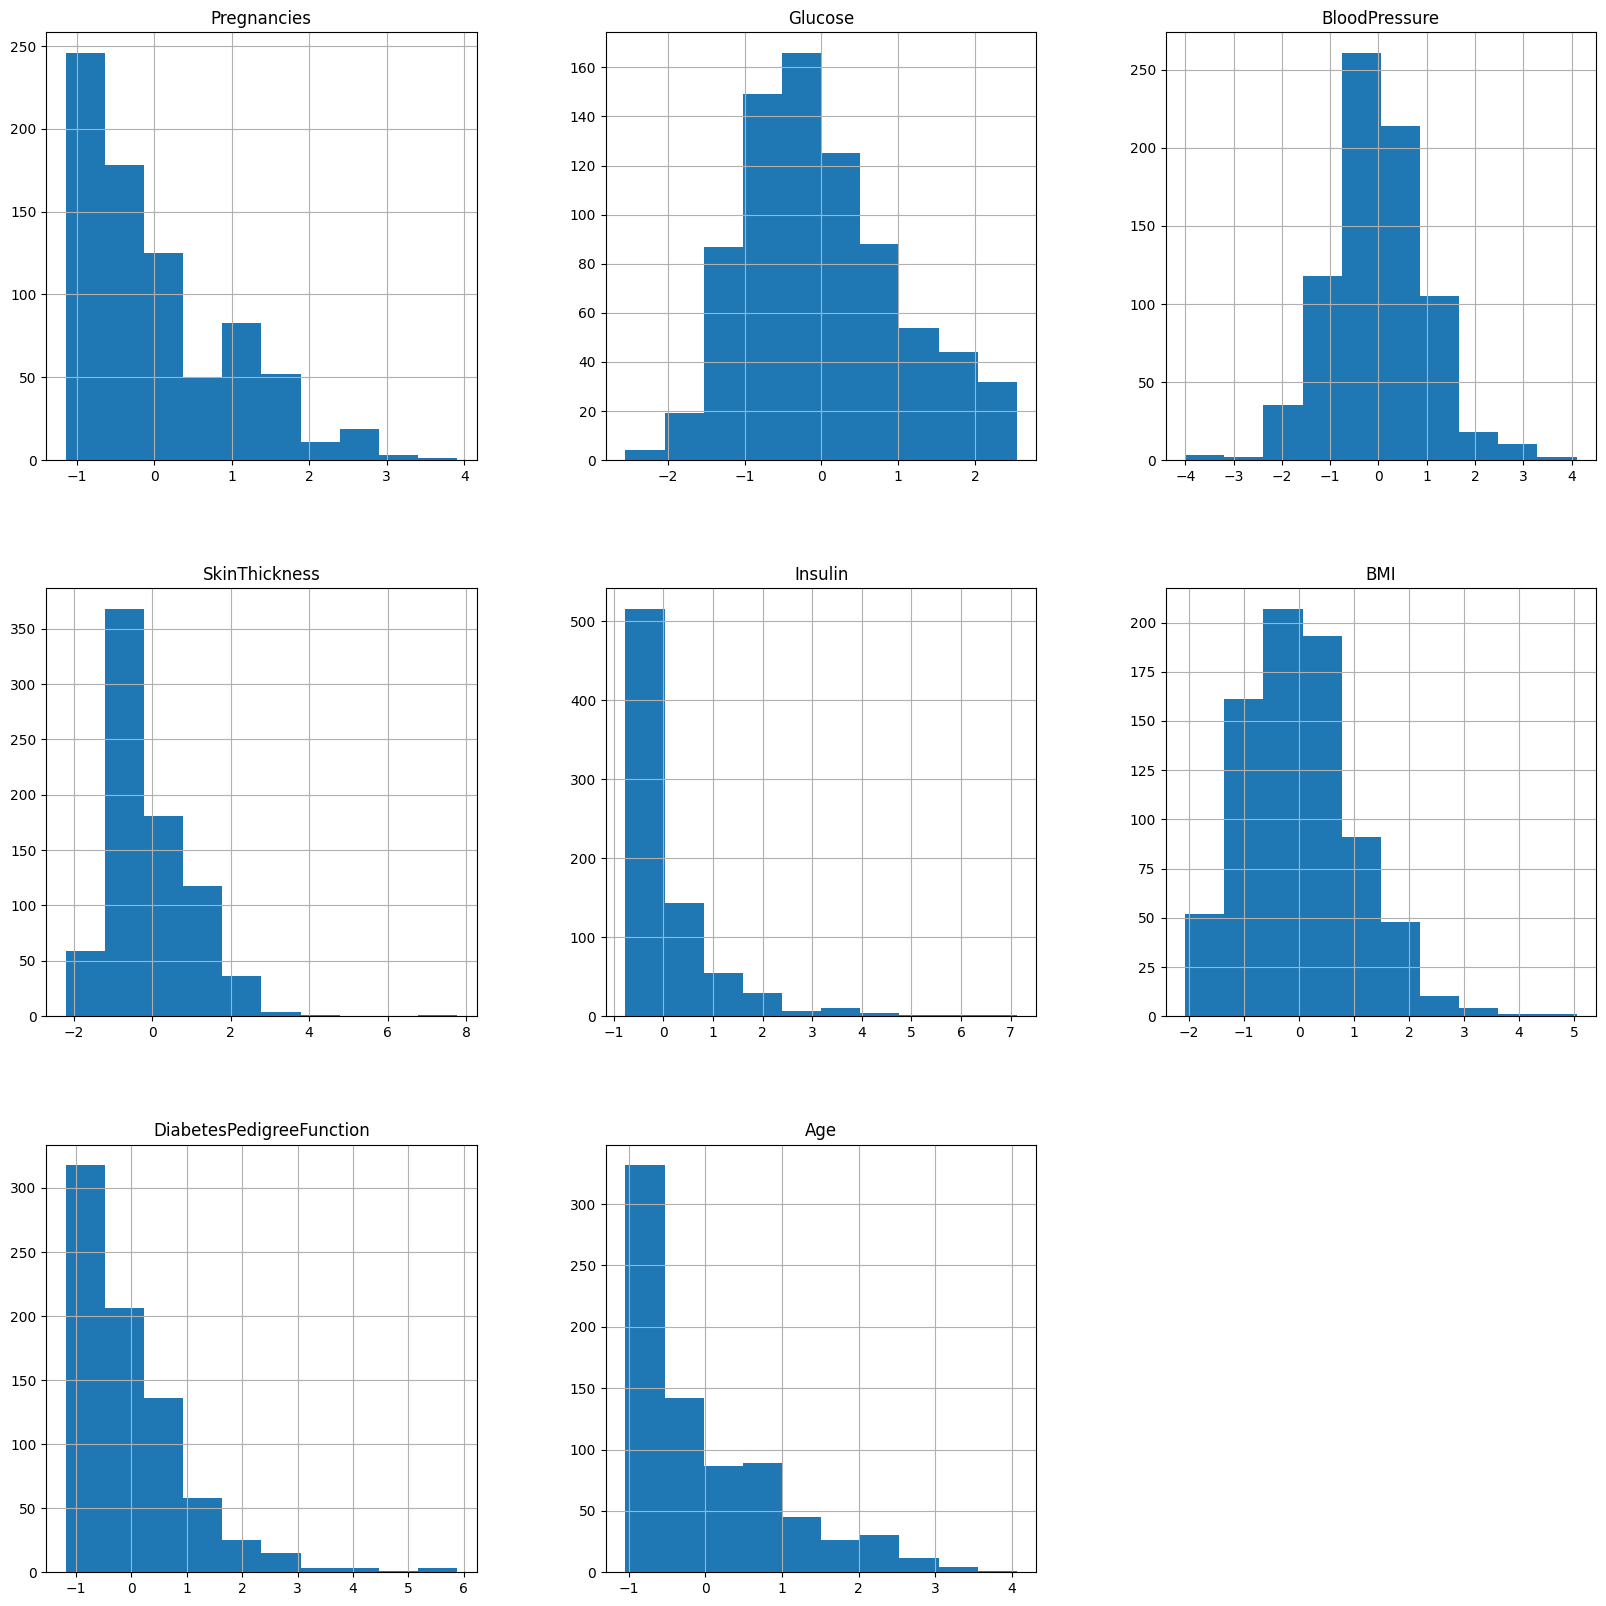

In [11]:
# Histograms
x.hist(figsize=(20,20))
"""
for v in x.columns:
    plt.hist(df[v])  
    plt.title(f"Histogram of {v}")
    plt.show()
"""


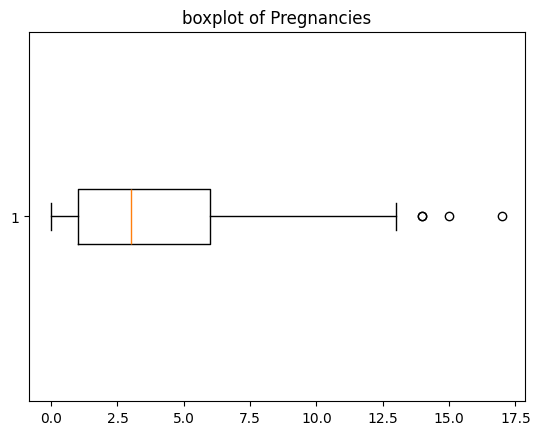

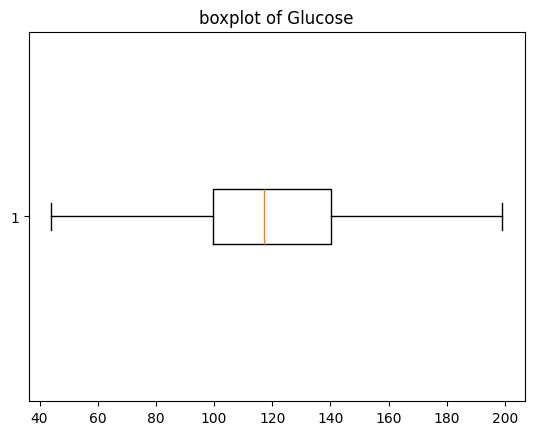

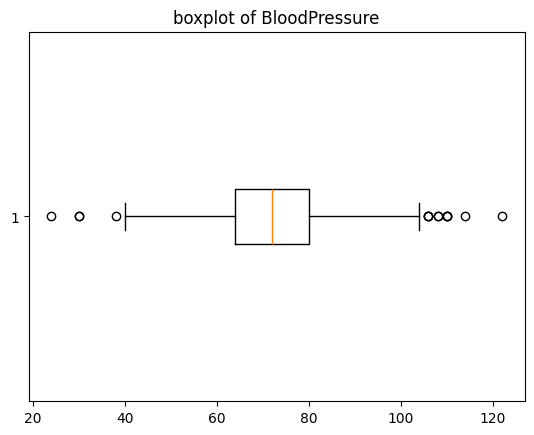

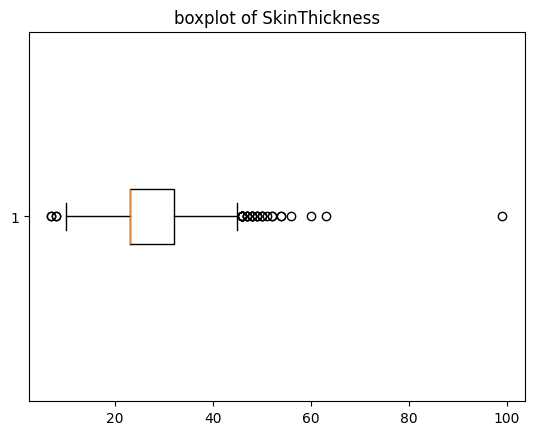

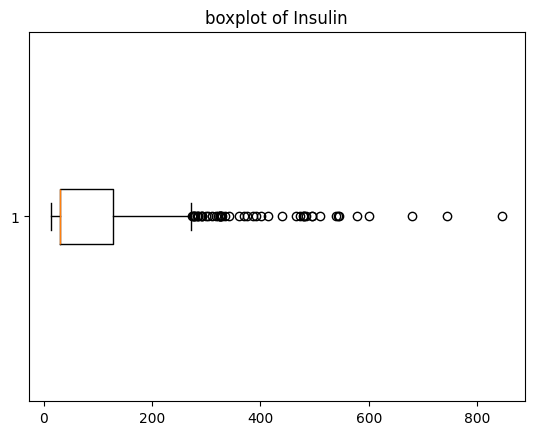

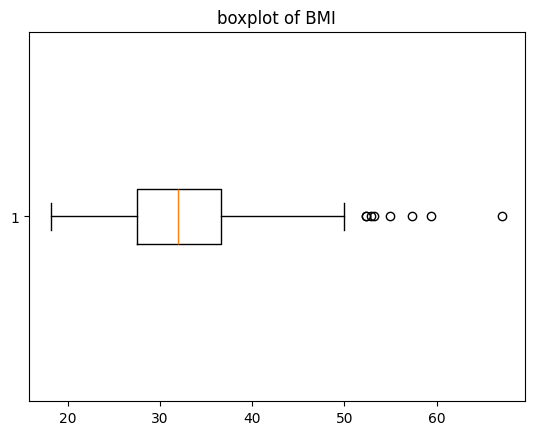

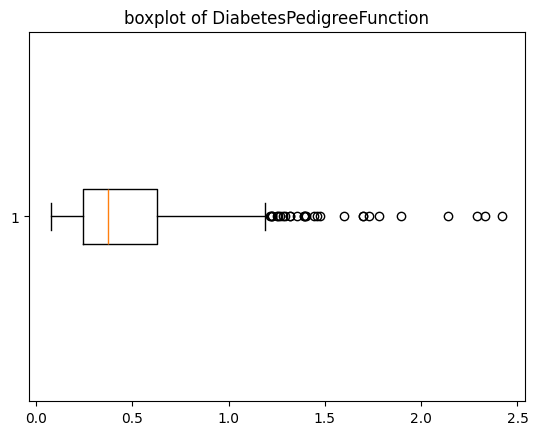

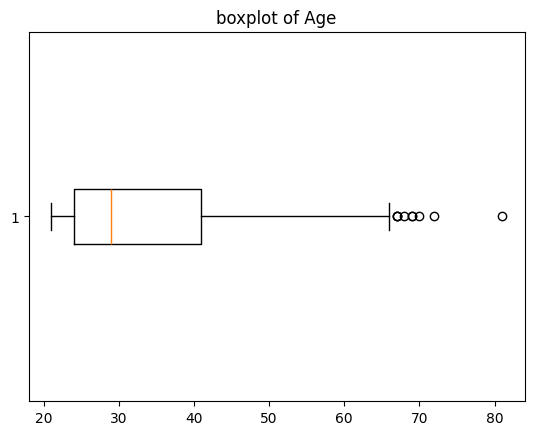

In [12]:
#box plot

for v in x.columns:
        plt.boxplot(df[v],vert=False)  
        plt.title(f"boxplot of {v}")
        plt.show()

In [13]:

#splitting data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=200)


#Fit the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix (Train):\n", cm_train)
print("Confusion Matrix (Test):\n", cm_test)


Confusion Matrix (Train):
 [[348  46]
 [ 96 124]]
Confusion Matrix (Test):
 [[95 11]
 [17 31]]


In [15]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

print("====== train ======")
score_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_score_train :", np.round(score_train,3))

r_score_train = recall_score(y_train, y_pred_train)
print("recall_score_train : ", np.round(r_score_train,3))

p_score_train = precision_score(y_train, y_pred_train)
print("precision_score_train : ", np.round(p_score_train,3))


f1_score_train = f1_score(y_train, y_pred_train)
print("f1_score_train : ", np.round(f1_score_train,3))


sp_score_train = recall_score(y_pred_train, y_train)
print("specificity score_train : ", np.round(sp_score_train,3))



print("====== test ======")

score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_score_test :", np.round(score_test,3))

r_score_test = recall_score(y_test, y_pred_test)
print("recall_score_test : ", np.round(r_score_test,3))

p_score_test = precision_score(y_test, y_pred_test)
print("precision_score_test : ", np.round(p_score_test,3))

f1_score_test = f1_score(y_test, y_pred_test)
print("f1_score_test : ", np.round(f1_score_test,3))

sp_score_test = recall_score(y_pred_test, y_test)
print("specificity score_test : ", np.round(sp_score_test,3))

====== train ======
Accuracy_score_train : 0.769
recall_score_train :  0.564
precision_score_train :  0.729
f1_score_train :  0.636
specificity score_train :  0.729
====== test ======
Accuracy_score_test : 0.818
recall_score_test :  0.646
precision_score_test :  0.738
f1_score_test :  0.689
specificity score_test :  0.738


================= train =================


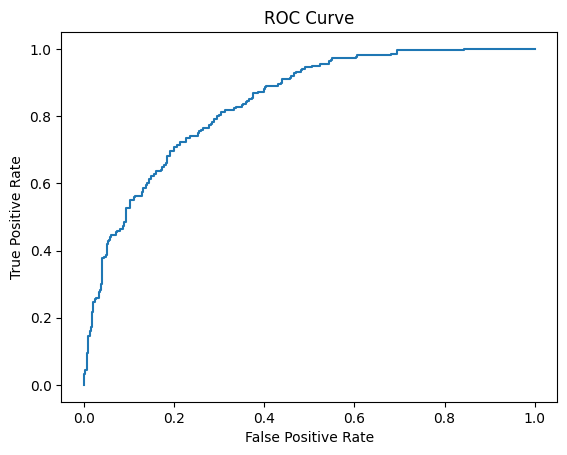

AUC Score: 0.8395823719427781

 ================= test =================


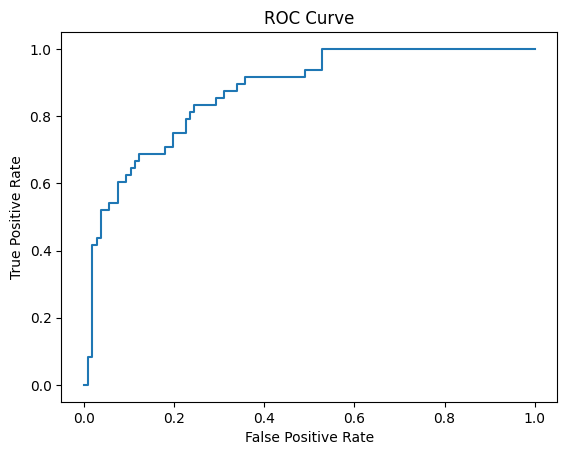

AUC Score: 0.8724449685534591


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

print("================= train =================")
y_prob = model.predict_proba(x_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_train, y_prob))



print("\n ================= test =================")
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, y_prob))


In [17]:
#Regularization Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,10,100], 'penalty':['l1','l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(x_train, y_train.values.ravel())
print(grid.best_params_)

{'C': 0.1, 'penalty': 'l1'}


In [18]:
#Finding best model based on tuning results
from sklearn.linear_model import LogisticRegression

best_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_model.fit(x_train, y_train.values.ravel())

y_pred = best_model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", np.round(accuracy_score(y_test, y_pred),3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.818

Confusion Matrix:
 [[95 11]
 [17 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       106
           1       0.74      0.65      0.69        48

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Load and clean data
df = pd.read_csv("diabetes.csv")
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_columns:
    df[col] = df[col].replace(0, df[col].median())

# Split data
x = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=200)

# Grid Search for best parameters
param_grid = {'C':[0.01,0.1,1,10,100], 'penalty':['l1','l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)

# Final model
best_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_model.fit(x_train, y_train)

# Save model and scaler
joblib.dump(best_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler Saved Successfully!")


Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Model and Scaler Saved Successfully!


In [ ]:
"""
-> What is the difference between Precision and Recall?

>> Precision tells how many of the predicted positive cases were actually correct

            Precision = TP/(TP+FP)

   High Precision = few false positives

>> Recall tells how many actual positive cases the model was able to detect.

              Recall = TP/(TP+FN)
 
    High Recall = few false negatives

"""

In [ ]:
"""
-> What is Cross-Validation and why is it important in Binary Classification?

>> Cross-validation is a technique where the dataset is divided into multiple parts(folds),
    and the model is trained and tested multiple times on different splits.
    
>>> Why is it important?
    It prevents overfitting
    It checks model performance on different samples
    It gives a more accurate and stable accuracy score
"""
